In [34]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import seaborn as sns
import time
import scipy

# Poisson Equation
##### Ana Júlia Antunes Souza and Cecilia Pires de Oliveira Capela

## 1. Problem proposed
In this project, we are interested in detemining the solution for the Poisson equation for an electrostatic potential problem. 
The electric potential in the presence of lines of charge is:
$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}= -\frac{\rho}{\epsilon_0}$$ 
where $\rho$ is the volumetric density of charges and $\epsilon_0$ is the electric permissivity in vacuum

For the values of these variables, we are going to use: 
$$\rho = 1 \qquad
\epsilon_0 = 8.8 \cdot 10^{-12}
$$

In [2]:
#Variables
N = 65
rho0 = 1
epsilon_0 = 8.8e-12

We are going to study the electrostatic potential of a condenser, which is limited to a $xy$ plan, where the domain is:

$$0\leq x \leq 1 \qquad 0\leq y \leq 1$$

The lines of charge are present in the following positions: 

$$\textit{ Positive charge line: } 0.25 \leq x \leq 0.75, y = 0.4$$

$$\textit{ Negative charge line: } 0.25 \leq x \leq 0.75, y = 0.6$$

### 1.1. Domain

To start the problem, we are going to create the domain where the electrostatic potential problem takes place. 

We can write:

$$\left\{\begin{matrix}
x_i = x_0 + i\Delta x & 0\leq i < N \\ 
y_j = y_0 + j\Delta y & 0\leq j < N 
\end{matrix}\right.$$

Then, we have to determine the $dx$ and $dy$ as well as the variations $\epsilon_x = \frac{1}{\Delta x^2}$ and $\epsilon_y = \frac{1}{\Delta y^2}$ for a square mesh with $N = 65$ subdivisions between $(x_0,y_0)$ and $(x_{ max},y_{max})$.

The following code implements these steps, as well as plots the domain with the lines of charge: 

In [18]:
#Variables
N = 64
rho0 = 1
epsilon_0 = 8.8e-12

#Creating domain
x = np.linspace(0,1, N)
y = np.linspace(0,1, N)

#Creating lines of charge
dx = 1/(N-1)
dy = dx
p = np.zeros((N,N))

jmin = int(0.25/dx)+1
jmax = int(0.75/dx)+1
i2 = int(0.6/dy)
i1 = int(0.4/dy)
for j in range(jmin, jmax):
        p[i2, j] = -rho0/epsilon_0
        p[i1, j] = rho0/epsilon_0

ex = dx**(-2)
ey = ex

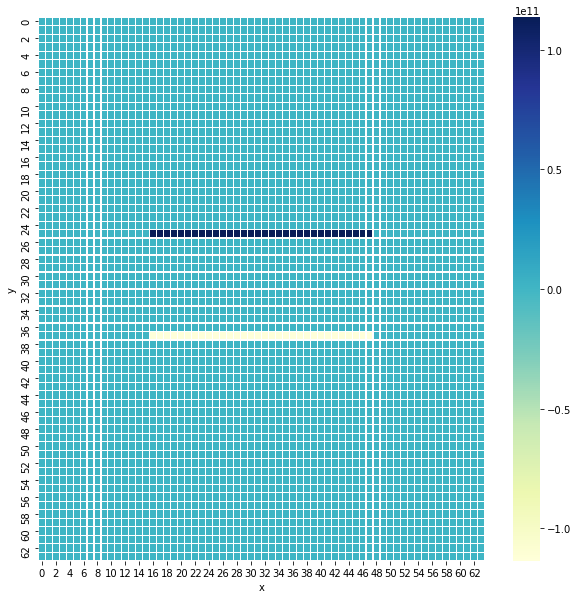

In [19]:
#Visualizing the lines of charge and the domain
plt.figure (figsize = (10,10))
ax = sns.heatmap(p, linewidth=0.1, cmap = "YlGnBu")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Solving the problem

### 2.1. Explanation of how to solve the problem numerically 

To solve numerically this problem, we have to write the second-order development of the Taylor Series for the derivatives:
$$\frac{\partial^2 U}{\partial x^2} \approx \frac{U(x+\Delta x, y) + U(x-\Delta x, y) - 2U(x,y)}{\Delta x^2}$$

$$\frac{\partial^2 U}{\partial y^2} \approx \frac{U(x, y+\Delta y) + U(x, y-\Delta x) - 2U(x,y)}{\Delta y^2}$$

We can rewrite the equation using discrete notation, which results in the following:

$$\epsilon_x(u_{i+1,j} + u_{i-1,j} - 2u_{i,j}) + \epsilon_y(u_{i,j+1}+ u_{i,j-1} - 2u_{i,j}) = \frac{\rho_{i,j}}{\varepsilon_0}$$

where:

$$\epsilon_x = \frac{1}{\Delta x^2} \textit{ et } \epsilon_y = \frac{1}{\Delta y^2} $$

Then, we are going to reindexate $i$ and $j$ as $k$ as to obtain 1D vectors:

$$k = iN + j, \textit{ with } 0\leq K < N^2$$

With the reindexation, the equation becomes:

$$\epsilon_x(u_{k+N+1} + u_{k-N-1}) + \epsilon_y(u_{k+1} + u_{k-1}) - 2(\epsilon_x + \epsilon_y)u_k = \frac{\rho_k}{\varepsilon_0}$$

Thus, the matrix of coefficients can be written as the following: 

- All the main diagonal terms are equal to $2(\epsilon_x + \epsilon_y)$;
- The terms just before and just after the main diagonal, therefore in the columns $k-1$ and $k+1$, are equal to $\epsilon_y$;
- The terms in the columns $k+N+1$ and $k-N-1$ are equal to $\epsilon_x.$

Substantially, a line of the matrix takes the following form:

$$\begin{bmatrix}
\cdots  & \epsilon_x &\cdots   & \epsilon_y  & -2(\epsilon_x + \epsilon_y) & \epsilon_y &\cdots \epsilon_x & \cdots  
\end{bmatrix}$$

Then, we need to indexate the constant vector ($\frac{\rho_k}{\varepsilon_0}$) as well. Before indexation, the constant vector is a $NxN$ matrix with the following form (considering $N = 10$ instead of $N=65$): 

$$\begin{bmatrix}
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
0 & 0  & 0  & \rho_0 & \rho_0 & \rho_0  & \rho_0  & 0 & 0 & 0\\
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
0 & 0  & 0  & -\rho_0 & -\rho_0 & -\rho_0  & -\rho_0  & 0 & 0 & 0\\
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
0 & 0  & 0  & 0 & 0 & 0  & 0  & 0 & 0 & 0\\
\end{bmatrix}$$

By applying the reindexation ($k = iN + j$), the constant vector becomes a column vector with $N^2$ columns.

The code bellow applies the steps mentioned above:

In [20]:
#Reindexing
#New rho 
pk = np.zeros ((N*N))
for i in range (N):
    for j in range (N):
        pk [i*N+j] = p [i,j]

#Matrix of coefficients
coef = np.zeros((N**2,N**2))

for k in range (N*N):
    coef [k,k] = -2*(ex+ey)
    if k-1 >= 0:
        coef [k,k-1] = ey
    if k+1 < (N*N):
        coef [k,k+1] = ey
    if k-N >=0 : 
        coef [k,k-N] = ex
    if k+N< (N*N): 
        coef [k,k+N] = ex

Thus, after this procedure, we have a linear system:
$$Ax = B$$
where $A$ is the matrix of coefficients (```coef ```) and B is the constant vector (```pk ```). 
$A$ has the size $(N^2 x N^2)$ and B has the size $(N^2, 1)$. Therefore, the system can be solved using a **linear system solving method**.

Up to this point, we were able to create the domain where the electric potential is present and we stablished the indexed coefficient and constant matrix. However, we still have not considered the boundary conditions of the problem Therefore, before solving the system, we are going to consider them:

### 2.2. Dirichlet boundary conditions
The Dirichlet boundary conditions is a boundary condition that specifies the values that a solution needs to take along the boundary of the domain. In our case, we are going to consider that there is no electric potential in the borders of the domain. In mathematical terms, 

$$V(x = 0, y) = 0 \qquad V(x = 1, y) = 0$$
$$V(x, y = 0) = 0 \qquad V(x, y = 1) = 0$$ 

considering that we have a domain where $0\leq x \leq 1$ and $0\leq y \leq 1$. 

As a result, to consider the boundary conditions, some of the terms in the coefficient matrix have to be equal to zero. But, since we have reindexed the terms with $k$, we have to equal to zero the following terms of the coefficient matrix:
* for $i=0$, ```coef(k, k-N) = 0```;  corresponding to the left border
* for $i= N-1$, ```coef(k, k+N) = 0```; corresponding to the right border
* for $j = 0$, ```coef(k, k-1) = 0```; corresponding to the bottom
* for $j = N-1$, ```coef(k, k+1) = 0```; corresponding to the top

Since $k = iN + j$, we can iterate over $k$ and get the values of $i$ and $j$ by accessing the quotient and the remainder, respectively: 
```python  
i,j = k//N,k%N
```   
And then, we can equal to zero the terms of the matrix of coefficient for the values of $k$ listed in the bullet points. 

The function ```Dirichlet(A)``` accounts for the Dirichlet conditions with the method described above:

In [21]:
def Dirichlet(A):  # These conditions put zeros in certain terms of A (which are the facteurs of uk in the boundaries)
   for k in range (N*N):
       i,j = k//N,k%N
       # in the left side i = 0
       if i == 0:
           #factor of k-N is zero
           if k-N>=0:
               A[k,k-N] = 0
       # in the right side i = N-1
       if i == N-1:
           if k+N < N*N:
               A[k,k+N] = 0

       # in the bottom j = 0  
       if (j==0):
           if k-1>=0:
               A[k,k-1] = 0
       # in the top j = N-1
       if j == N-1:
           if k+1<N*N:             
               A[k,k+1] = 0

   return A

coef = Dirichlet(coef)

### 2.3. Solving linear system

Now, we are going to solve the linear systhem. Firstly, we are going to implement the solution with the linalg.solve method of numpy, which inverts the coefficients matrix and solve the systhem. This method will be our reference in order to solve the Poisson equation.

In [22]:
start_np = time.time()
grand_u = np.linalg.solve(coef,pk)
end_np = time.time()
np_time = end_np-start_np
pot_np = np.zeros((N,N))

### 2.4. Returning to x and y 
We found the electric potential for the k-indexed linear system. The next (and final) step to determine the solution to the problem is to **return to the $i$ and $j$ indexation**, as to be able to plot the solution to the electrostatic potential problem in a 2D-grid. 
To do that, we will iterate over the values of $i$ and $j$ and use the indexation $k = iN + j$ to go back to $u_{i,j}$ instead of $u_k$:

In [23]:
for i in range(N):
    for j in range(N):
        pot_np[i,j] = grand_u[i*N+j]

## 3. Results

### 3.1. Plot of the electric potential

We can plot the electric potential in a 2D-grid, which gives the following result:

Text(0.5, 1.0, '$\\nabla^2 u = -\\rho/\\epsilon_0$')

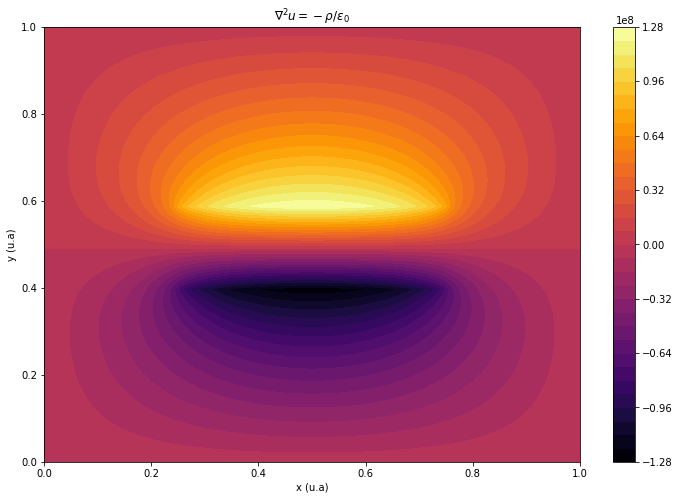

In [24]:
py.figure(figsize = (12,8))
py.contourf(x,y,pot_np, 40, cmap = 'inferno')
py.colorbar()
py.xlabel('x (u.a)')
py.ylabel('y (u.a)')
py.title(r'$\nabla^2 u = -\rho/\epsilon_0$')

As can be noted, the graph is consistent with our electric potential problem. One can notice that the electric potential is strongest where the lines of charge are located. Moreover, the electric potential is equal to zero in the boundaries of the system, which is in fact what we expected by imposing the Dirichlet boundary conditions.
Thus, we can assume that the solutions found for the problem represent well the physical system we were dealing with. 

### 3.2. Electric field 

#### 3.2.1. Calculating the electric field
In electromagnetism, if the electric potential is known at every point in a region of space (which is the case of our problem), one can derive the electric field from the potential. In fact, in vector calculus notation, the electric field is given by the negative of the gradient of the electric potential:
$$E = −\nabla V$$ 

Using this expression, we can calculate the electric field at a given point in our domain. To compute the gradient of the potential, we are going to use the ```numpy``` function ```np.gradient()```. 
The electric field is a vector, thus it has both a direction and magnitude. Therefore, to plot the electric field, we will use a matplotlib quiver plot, which contains the magnitude and the direction of the electric vectors.

#### 3.2.1. Plot of the electric field

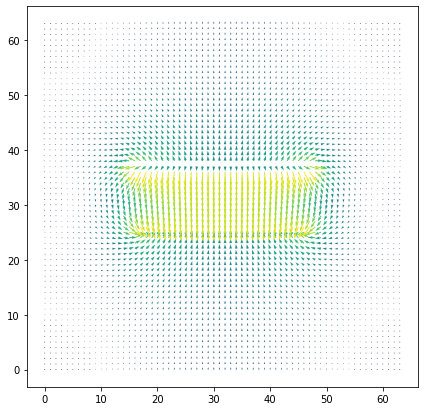

In [26]:
import matplotlib

u = -np.gradient(pot_np,axis=0)
v = -np.gradient(pot_np,axis=1)
n = -2

# Defining color
color_array = np.sqrt((abs((u-n))/2)*2 + (abs((v-n))/2)*2)

fig, ax = plt.subplots(figsize=(7,7))
ax.quiver(v,u,color_array)
plt.show()

We can verify that the direction of the vectors goes from positive towards negative charges, as expected, and it gets more intense closer to the lines of charge. That is another indication that our solution is correct.

## 4. Optimizing

### 4.1. Solving the linear system by different methods 

We already have our solution to the Poisson equation, but we would like to evaluate wheter we could use a better method, in terms of time efficiency and simplicity. So, we compared the solutions using the methods:

$\bullet$ Sparse matrix (with scipy), which can spare memory while solving linear systhems

In [36]:
start_sparse = time.time()
coef_sparse = scipy.sparse.csc_matrix(coef)
u_sparse = scipy.sparse.linalg.spsolve(coef_sparse,pk)
end_sparse = time.time()
sparse_time = end_sparse-start_sparse
pot_sparse = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        pot_sparse[i,j] = u_sparse[i*N+j]

$\bullet$ Jacobi, which is a simple and well-known method

In [30]:
def Jacobi(A, b, N, x_init): 
    init = time.time()
    D = np.diag(A)
    R = A - np.diagflat(D)
    for i in range(N):
        x = (b - R.dot(x_init))/D
        x_init = x
    end = time.time()
    elapsed = end-init
    return x, elapsed

u_jacobi, t_jacobi = Jacobi (coef, pk, int(1e4), np.zeros(len(pk)))

$\bullet$ LU decomposition, which is a more complicated method than Jacobi, but is known to be more efficient.

In [37]:
from scipy.linalg import lu_factor, lu_solve
start_lu = time.time()
lu, piv = lu_factor(coef)
u_lu = lu_solve((lu,piv),pk)
end_lu = time.time()
lu_time = end_lu-start_lu
pot_lu = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        pot_lu[i,j] = u_lu[i*N+j]

### 4.2. Efficiency of each method

In order to compare the efficiency of the methods, we are going to compare the times that they take to solve systhems with 16, 32 and 65 points for x and y (Note: the times have been tested and taken beforehand, only the results are show). That way, we can plot the following graph:

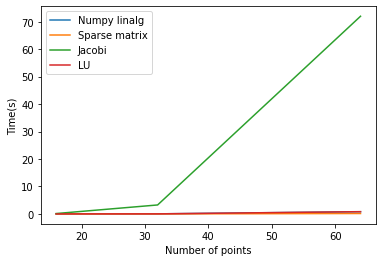

In [32]:
t_np = np.array([0.0009982585906982422,0.02693772315979004,0.7964022159576416])
t_sparse = np.array([0.002992868423461914,0.011964082717895508,0.14734625816345215])
t_jacobi = np.array([0.14024019241333008,3.2626185417175293,71.98724794387817])
t_lu = np.array([0.0018117427825927734,0.025008201599121094,0.8239891529083252])
numbers = np.array([16,32,64])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(numbers,t_np,label='Numpy linalg')
ax1.plot(numbers,t_sparse,label='Sparse matrix')
ax1.plot(numbers,t_jacobi, label='Jacobi')
ax1.plot(numbers,t_lu,label='LU')
plt.xlabel('Number of points')
plt.ylabel('Time(s)')
plt.legend()
plt.show()

We can clearly see that the Jacobi method was very time consuming, especially when we increased the number of points. Now, we take out the Jacobi and remake the graph to compare the other methods:

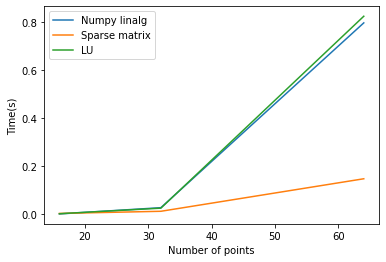

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(numbers,t_np,label='Numpy linalg')
ax1.plot(numbers,t_sparse,label='Sparse matrix')
ax1.plot(numbers,t_lu,label='LU')
plt.xlabel('Number of points')
plt.ylabel('Time(s)')
plt.legend()
plt.show()

We can verify that the linalg.solve and the LU decomposition had very similar performances, which is expected because the numpy algorithm uses, amongst others, the LU method in order to solve linear systhems. The sparse matrix had the lowest time. That happens because most of the elements in our coefficients matrix are in the diagonals, and most of the matrix consists of zeros. So, using a sparse matrix method is adequate and time-saving.

## 5. Conclusion

We can conclude that we were able to succesfully solve the Poisson equation, and the plots show that our results were realistic. Furthermore, we were able to compare different methods in order to solve the equation, and we verified that using a sparse matrix method provides advantages.